<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.Setting-up-the-directory" data-toc-modified-id="1.Setting-up-the-directory-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1.Setting up the directory</a></span></li><li><span><a href="#2.Import-libraries" data-toc-modified-id="2.Import-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2.Import libraries</a></span></li><li><span><a href="#3.Get-tweets" data-toc-modified-id="3.Get-tweets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3.Get tweets</a></span></li><li><span><a href="#4.Convert-to-dataframe-and-export-to-csv" data-toc-modified-id="4.Convert-to-dataframe-and-export-to-csv-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4.Convert to dataframe and export to csv</a></span></li><li><span><a href="#5.Plot-the-tweets" data-toc-modified-id="5.Plot-the-tweets-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>5.Plot the tweets</a></span></li></ul></div>

<h1>Tweets using Twitter Academic API<span class="tocSkip"></span></h1>

#### 3.Get tweets

In [ ]:
# Add this code to the console to prevent Colab from disconnecting:
# function KeepClicking(){
# console.log("Clicking");
# document.querySelector("colab-connect-button").click()
# }
# setInterval(KeepClicking,60000)

In [7]:
%cd ../notebooks/
%cd data/
# %pwd
# notebooks/
# !twarc2 counts --csv --archive --start-time "2018-01-01" --end-time "2021-08-31" " public charge rule"  --granularity day  > '../data/filetest.csv'

!twarc2 search  --start-time "2020-12-01" --end-time "2021-09-15" "(vaccine OR vaccination OR moderna OR pfizer OR #antivax OR #CashingInOnCovid OR #MyBodyMyChoice OR #Vax) lang:en place_country:US -is:retweet" --archive tweets_122020_092021_v2.jsonl 

[Errno 2] No such file or directory: '../notebooks/'
/Shareddrives/Shareddrives/Data Hub/TwitterCOVIDVaccineAnalysis
/Shareddrives/Shareddrives/Data Hub/TwitterCOVIDVaccineAnalysis/data


In [9]:
%ls
# %cd ../data/ 
# %pwd

!twarc2 csv tweets_122020_092021.jsonl tweets_122020_092021.csv

'results (1).csv'              tweets_122020_092021_v2.csv
'results (1).gsheet'           tweets_122020_092021_v2.jsonl
 results.csv                   tweets.csv
 results.gsheet                tweets_Jan2021.csv
 results.json                  tweets_Jan2021.jsonl
 twarc.log                     tweets_test.csv
 tweets_122020_092021.csv      Twitter_data_9_15_21.csv
 tweets_122020_092021.gsheet   vaccineTweets_012021-042021_ready.csv
 tweets_122020_092021.jsonl


#### 4.Convert to dataframe and export to csv

In [10]:
!pip install -U pandas-profiling

In [11]:
%ls
tweets = pd.read_csv('tweets_122020_092021.csv', parse_dates = ['created_at']  )

'results (1).csv'              tweets_122020_092021_v2.csv
'results (1).gsheet'           tweets_122020_092021_v2.jsonl
 results.csv                   tweets.csv
 results.gsheet                tweets_Jan2021.csv
 results.json                  tweets_Jan2021.jsonl
 twarc.log                     tweets_test.csv
 tweets_122020_092021.csv      Twitter_data_9_15_21.csv
 tweets_122020_092021.gsheet   vaccineTweets_012021-042021_ready.csv
 tweets_122020_092021.jsonl


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (33,75,86,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
# %pwd
tweets.shape

(687227, 94)

In [13]:
tweets.head(5)

,id,created_at,text,attachments.media,attachments.media_keys,attachments.poll.duration_minutes,attachments.poll.end_datetime,attachments.poll.id,attachments.poll.options,attachments.poll.voting_status,attachments.poll_ids,author.id,author.created_at,author.username,author.name,author.description,author.entities.description.cashtags,author.entities.description.hashtags,author.entities.description.mentions,author.entities.description.urls,author.entities.url.urls,author.location,author.pinned_tweet_id,author.profile_image_url,author.protected,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,author.url,author.verified,author.withheld.scope,author.withheld.copyright,author.withheld.country_codes,author_id,context_annotations,conversation_id,entities.annotations,entities.cashtags,entities.hashtags,...,in_reply_to_user.created_at,in_reply_to_user.username,in_reply_to_user.name,in_reply_to_user.description,in_reply_to_user.entities.description.cashtags,in_reply_to_user.entities.description.hashtags,in_reply_to_user.entities.description.mentions,in_reply_to_user.entities.description.urls,in_reply_to_user.entities.url.urls,in_reply_to_user.location,in_reply_to_user.pinned_tweet_id,in_reply_to_user.profile_image_url,in_reply_to_user.protected,in_reply_to_user.public_metrics.followers_count,in_reply_to_user.public_metrics.following_count,in_reply_to_user.public_metrics.listed_count,in_reply_to_user.public_metrics.tweet_count,in_reply_to_user.url,in_reply_to_user.verified,in_reply_to_user.withheld.scope,in_reply_to_user.withheld.copyright,in_reply_to_user.withheld.country_codes,in_reply_to_user_id,lang,possibly_sensitive,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,reply_settings,source,withheld.scope,withheld.copyright,withheld.country_codes,type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 93
0,1437929091043368961,2021-09-14 23:59:45+00:00,I was scared for awhile to get the vaccine 💉.....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1092201403861397507,2019-02-03T23:21:21.000Z,LibraAbsolut,Absolut.LIBRA,*historian* activist ✊🏾 * artist 👨🏾‍🎤 * realit...,NaN,"[{""start"": 58, ""end"": 63, ""tag"": ""FAMU""}, {""st...",NaN,NaN,NaN,"Washington, DC",NaN,https://pbs.twimg.com/profile_images/143985676...,False,471,727,6,71009,NaN,False,NaN,NaN,NaN,1092201403861397507,"[{""domain"": {""id"": ""65"", ""name"": ""Interests an...",1437929091043368961,NaN,NaN,"[{""start"": 173, ""end"": 189, ""tag"": ""FullyVacci...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,False,6,0,0,0,NaN,everyone,Twitter for iPad,NaN,NaN,NaN,NaN,2021-09-25T00:19:37+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.5.0,NaN
1,1437903323772948482,2021-09-14 22:17:21+00:00,@esfd283 @IdentifyTexas @ChrisHorvatits4 @jfdi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278723584,2011-04-07T21:01:10.000Z,timcguinness,Tim McGuinness,"Husband, dad, and educator.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/profile_images/142552934...,False,40,165,0,855,NaN,False,NaN,NaN,NaN,278723584,"[{""domain"": {""id"": ""123"", ""name"": ""Ongoing New...",1437841199700795395,NaN,NaN,NaN,...,2009-03-11T11:13:12.000Z,esfd283,Scott McInnis,"Buffalo Bills,SU,Sabres. AHL Off Ice Official....",NaN,"[{""start"": 113, ""end"": 124, ""tag"": ""BillsMafia""}]",NaN,NaN,NaN,"East Syracuse,NY",NaN,https://pbs.twimg.com/profile_images/991437064...,False,1207.0,2516.0,16.0,22750.0,NaN,False,NaN,NaN,NaN,23747550.0,en,False,0,0,1,0,"[{""type"": ""replied_to"", ""id"": ""143790020708634...",everyone,Twitter for iPhone,NaN,NaN,NaN,replied_to,2021-09-25T00:19:37+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.5.0,NaN
2,1437928892833091586,2021-09-14 23:58:58+00:00,@timcguinness @IdentifyTexas @ChrisHorvatits4 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23747550,2009-03-11T11:13:12.000

In [14]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687227 entries, 0 to 687226
Data columns (total 94 columns):
 #   Column                                           Non-Null Count   Dtype              
---  ------                                           --------------   -----              
 0   id                                               687227 non-null  int64              
 1   created_at                                       687227 non-null  datetime64[ns, UTC]
 2   text                                             687227 non-null  object             
 3   attachments.media                                97259 non-null   object             
 4   attachments.media_keys                           97259 non-null   object             
 5   attachments.poll.duration_minutes                1012 non-null    float64            
 6   attachments.poll.end_datetime                    1012 non-null    object             
 7   attachments.poll.id                              1012 non-null   

#### 5.Plot the tweets

In [15]:
tweets['year'] = pd.DatetimeIndex(tweets['created_at']).year
tweets['month'] = pd.DatetimeIndex(tweets['created_at']).month
tweets['day'] = pd.to_datetime(tweets['created_at']).dt.to_period('D')
tweets['month_year'] = pd.to_datetime(tweets['created_at']).dt.to_period('M')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [16]:
tweets = tweets.reset_index()
# tweets = tweets.set_index('created_at')
# tweets.head()

In [17]:
filter =  (tweets["day"]>'2020-11-30') & (tweets["day"]<'2021-09-01')
tweets_df = tweets.loc[filter]
tweets_df.tail(5)


,index,id,created_at,text,attachments.media,attachments.media_keys,attachments.poll.duration_minutes,attachments.poll.end_datetime,attachments.poll.id,attachments.poll.options,attachments.poll.voting_status,attachments.poll_ids,author.id,author.created_at,author.username,author.name,author.description,author.entities.description.cashtags,author.entities.description.hashtags,author.entities.description.mentions,author.entities.description.urls,author.entities.url.urls,author.location,author.pinned_tweet_id,author.profile_image_url,author.protected,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,author.url,author.verified,author.withheld.scope,author.withheld.copyright,author.withheld.country_codes,author_id,context_annotations,conversation_id,entities.annotations,entities.cashtags,...,in_reply_to_user.entities.description.cashtags,in_reply_to_user.entities.description.hashtags,in_reply_to_user.entities.description.mentions,in_reply_to_user.entities.description.urls,in_reply_to_user.entities.url.urls,in_reply_to_user.location,in_reply_to_user.pinned_tweet_id,in_reply_to_user.profile_image_url,in_reply_to_user.protected,in_reply_to_user.public_metrics.followers_count,in_reply_to_user.public_metrics.following_count,in_reply_to_user.public_metrics.listed_count,in_reply_to_user.public_metrics.tweet_count,in_reply_to_user.url,in_reply_to_user.verified,in_reply_to_user.withheld.scope,in_reply_to_user.withheld.copyright,in_reply_to_user.withheld.country_codes,in_reply_to_user_id,lang,possibly_sensitive,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,reply_settings,source,withheld.scope,withheld.copyright,withheld.country_codes,type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 93,year,month,day,month_year
687221,687221,1333562669786308608,2020-12-01 00:04:51+00:00,Habemus vacunas!!! Next month thanks @pfizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2947040213,2014-12-29T00:31:14.000Z,phoenixflaco,@leks,Now is the time! don’t wait just do it! Mexica...,NaN,NaN,NaN,NaN,"[{""start"": 0, ""end"": 23, ""url"": ""https://t.co/...","Arizona, USA",NaN,https://pbs.twimg.com/profile_images/130363492...,False,144,1448,0,10776,https://t.co/4LSC2eHjxA,False,NaN,NaN,NaN,2947040213,"[{""domain"": {""id"": ""123"", ""name"": ""Ongoing New...",1333562669786308608,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,False,0,0,0,0,NaN,everyone,Twitter for iPhone,NaN,NaN,NaN,NaN,2021-09-25T04:34:13+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.5.0,NaN,2020,12,2020-12-01,2020-12
687223,687223,1333562465825681410,2020-12-01 00:04:02+00:00,@DianeRavitch Just no. Science is EXACT? Examp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,854806771684089856,2017-04-19T21:19:50.000Z,EC_SysSolutions,EC System Solutions,"ECSS works with governments, nonprofits, corpo...",NaN,NaN,NaN,NaN,"[{""start"": 0, ""end"": 23, ""url"": ""https://t.co/...","San Diego, CA",NaN,https://pbs.twimg.com/profile_images/854832535...,False,283,1176,1,793,https://t.co/ObuoWKVnN3,False,NaN,NaN,NaN,854806771684089856,"[{""domain"": {""id"": ""123"", ""name"": ""Ongoing New...",1333232273462882306,NaN,NaN,...,NaN,NaN,NaN,"[{""start"": 35, ""end"": 57, ""url"": ""http://t.co/...","[{""start"": 0, ""end"": 22, ""url"": ""http://t.co/9...",Greenport,NaN,https://pbs.twimg.com/profile_images/132664132...,False,156081.0,1803.0,3980.0,118206.0,http://t.co/9Yh2RDylKv,False,NaN,NaN,NaN,5.901064e+07,en,False,0,0,0,0,"[{""type"": ""replied_to"", ""id"": ""133323227346288...",everyone,Twitter for iPhone,NaN,NaN,NaN,NaN,2021-09-25T04:34:13+00:00,https://api.twitter.com/2/tweets/search/all?ex...,2.5.0,NaN,2020,12,2020-12-01,2020-12
687224,687224,1333561854942208002,2020-12-01 00:01:37+00:00,100 Percent Of Americans Will Be Able To Get V...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16382374,2008-09-20T22

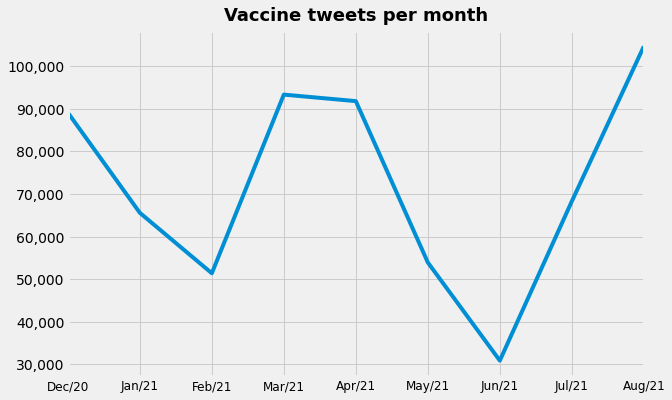

In [18]:
from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt 



plt.style.available
# plt.style.use('default')
# plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')


monthly_tweets = tweets_df.groupby('month_year').size()
monthly_tweets
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
p = monthly_tweets.plot(kind='line',  figsize=(10,6),
                            alpha=1, fontsize=14)
ax.set_xticks([611,612, 613,614,615,616,617,618,619])
ax.set_xticklabels(['Dec/20','Jan/21','Feb/21','Mar/21', 'Apr/21', 'May/21', 'Jun/21', 'Jul/21', 'Aug/21'])
# # prettify the graph
p.set_title("Vaccine tweets per month", fontsize=18, pad=10,  fontweight='bold')
p.set_xlabel('', fontsize=18, labelpad=10)


p.set_ylabel('', fontsize=14, labelpad=10 )

p.yaxis.set_major_formatter(FormatStrFormatter('% 1.0f'), ) 

p.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks( fontsize=12)


plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


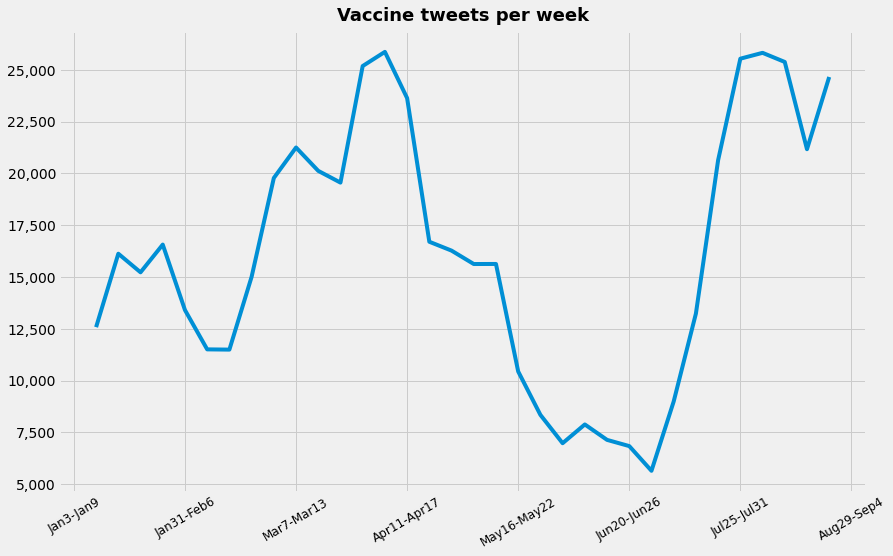

In [19]:
from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator) 
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt 

tweets_df['week'] = tweets_df['created_at'].dt.week
# tweets_df = tweets_df.reset_index()
filter = (tweets_df['week']<35)
tweets_week = tweets_df.loc[filter]

plt.style.available
# plt.style.use('default')
# plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')


week = tweets_week.groupby('week').size()

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
p = week.plot(kind='line',  figsize=(14,8),
                            alpha=1, fontsize=14)
ax.set_xticks([0, 5,10, 15,20,25, 30,35])
ax.set_xticklabels(['Jan3-Jan9', 'Jan31-Feb6','Mar7-Mar13','Apr11-Apr17','May16-May22', 'Jun20-Jun26', 'Jul25-Jul31', 'Aug29-Sep4'])
# # prettify the graph
p.set_title("Vaccine tweets per week", fontsize=18, pad=10,  fontweight='bold')
p.set_xlabel('', fontsize=12)

p.set_ylabel('', fontsize=14, labelpad=10 )

p.yaxis.set_major_formatter(FormatStrFormatter('% 1.0f'), ) 

p.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks( fontsize=12, rotation=30)


plt.show()

